In [1]:
# NLTK 本体
import nltk
from nltk import CFG

In [2]:
grammar = "CHUNK: {<NP> <ADJ * [NN] +>}"

In [3]:
cp = nltk.RegexpParser(grammar)

In [4]:
brown = nltk.corpus.brown

In [5]:
for sent in brown.tagged_sents():
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'CHUNK': print(subtree)


In [6]:
patterns = """
P: {<NN><VBD><JJ>(<CC><JJ>)?}
"""

In [7]:
PChunker = nltk.RegexpParser(patterns)

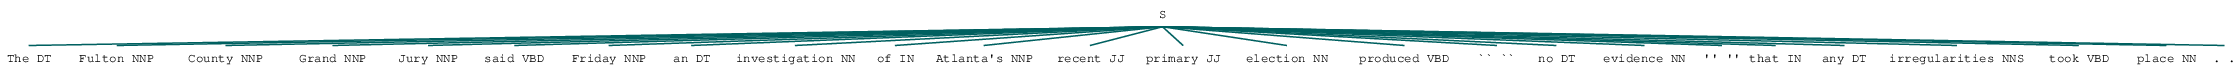

In [8]:
sent1 = brown.sents()[0]
PChunker.parse(nltk.pos_tag(sent1))

In [9]:
sent1

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

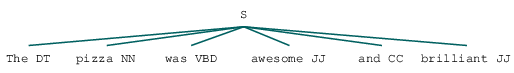

In [10]:
#sent1 = brown.sents()[2]
sent1 = ['The', 'pizza', 'was', 'awesome', 'and', 'brilliant']
patterns = """
P: {<NP> <ADJ*[NN]+>}
"""
PChunker = nltk.RegexpParser(patterns)
PChunker.parse(nltk.pos_tag(sent1))

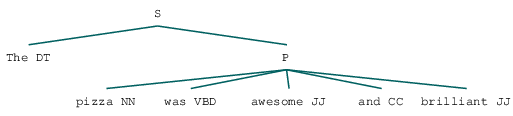

In [11]:
patterns = """
P: {<NN><VBD><JJ>(<CC><JJ>)?}
"""
PChunker = nltk.RegexpParser(patterns)
PChunker.parse(nltk.pos_tag(sent1))

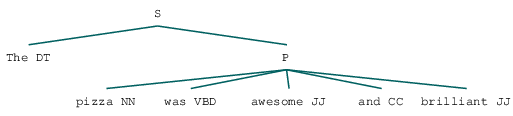

In [12]:
patterns = """
P: {<NN><VBD><JJ><CC><JJ>}
{<NN><VBD><JJ>}
"""
PChunker = nltk.RegexpParser(patterns)
PChunker.parse(nltk.pos_tag(sent1))

In [13]:
sent2 = ['The', 'pizza', 'was', 'good', 'but', 'pasta', 'was', 'bad']

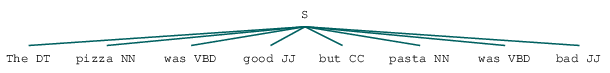

In [14]:

patterns = """
NP: {<ADJ*> <NN>+}
"""
PChunker = nltk.RegexpParser(patterns)
PChunker.parse(nltk.pos_tag(sent2))

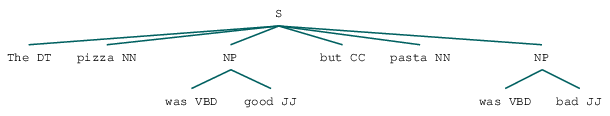

In [15]:
patterns = """
NP: {<VBD><JJ>}
"""
PChunker = nltk.RegexpParser(patterns)
PChunker.parse(nltk.pos_tag(sent2))

In [16]:
sent = "The apple beside the tree is a good macintosh".split(" ")

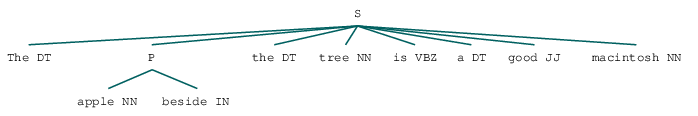

In [17]:
patterns = """
P:{<NN><IN>}
"""
PChunker = nltk.RegexpParser(patterns)
PChunker.parse(nltk.pos_tag(sent))

In [18]:
parser = nltk.RegexpParser('''
NP: {<JJ>* <NN>+} # NP
''')

In [19]:
nltk.pos_tag(sent)

[('The', 'DT'),
 ('apple', 'NN'),
 ('beside', 'IN'),
 ('the', 'DT'),
 ('tree', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('macintosh', 'NN')]

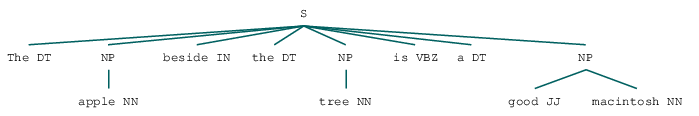

In [20]:
parser.parse(nltk.pos_tag(sent))

In [21]:
jpcfg1 = """
NP: {<名詞|動詞> <助詞|助動詞> <名詞>}
{<連体詞|形容詞> <名詞>}
"""
parser = nltk.RegexpParser(jpcfg1)

In [22]:
sent = mecab_list("綺麗な花")
print(parser.parse(sent))

NameError: name 'mecab_list' is not defined

In [23]:
import MeCab

def mecab_list(text):
    tagger = MeCab.Tagger("-Ochasen")
    tagger.parse('')
    node = tagger.parseToNode(text)
    word_class = []
    while node:
        word = node.surface
        wclass = node.feature.split(',')
        if wclass[0] != u'BOS/EOS':
            if wclass[0] == "助詞":
                wclass[0] += wclass[1]
            if wclass[6] == None:
                word_class.append((word,wclass[0]))
            else:
                word_class.append((word,wclass[0]))
        node = node.next
    return word_class

In [24]:
mecab_list("学生の自転車")

[('学生', '名詞'), ('の', '助詞連体化'), ('自転車', '名詞')]

In [25]:
mecab_list("あの人")

[('あの', '連体詞'), ('人', '名詞')]

In [26]:
mecab_list("白い花")

[('白い', '形容詞'), ('花', '名詞')]

In [27]:
mecab_list("綺麗な花")

[('綺麗', '名詞'), ('な', '助動詞'), ('花', '名詞')]

In [28]:
mecab_list("太った人")

[('太っ', '動詞'), ('た', '助動詞'), ('人', '名詞')]

In [29]:
mecab_list("コンビニで買ったコーヒー")

[('コンビニ', '名詞'), ('で', '助詞格助詞'), ('買っ', '動詞'), ('た', '助動詞'), ('コーヒー', '名詞')]

In [30]:
mecab_list("王さんがくれたパン")

[('王', '名詞'),
 ('さん', '名詞'),
 ('が', '助詞格助詞'),
 ('くれ', '動詞'),
 ('た', '助動詞'),
 ('パン', '名詞')]

In [31]:
mecab_list("お酒が大好きな太郎")

[('お', '接頭詞'),
 ('酒', '名詞'),
 ('が', '助詞格助詞'),
 ('大好き', '名詞'),
 ('な', '助動詞'),
 ('太郎', '名詞')]

In [32]:
test = "テキストや談話を理解するためには，まずその文章構造を理解する必要がある．文章構造に関する従来の多くの研究では，解析に用いられる知識の問題に重点がおかれていた．しかし，量的/質的に十分な計算機用の知識が作成されることはしばらくの間期待できない．本論文では，知識に基づく文理解という処理を行なわずに，表層表現中の種々の情報を用いることにより科学技術文の文章構造を自動的に推定する方法を示す．表層表現中の情報としては，種々の手がかり表現，同一/同義の語/句の出現，2文間の類似性，の3つのものに着目した．実験の結果これらの情報を組み合わせて利用することにより科学技術文の文章構造のかなりの部分が自動的に推定可能であることがわかった．"

In [33]:
mecab_list(test)

[('テキスト', '名詞'),
 ('や', '助詞並立助詞'),
 ('談話', '名詞'),
 ('を', '助詞格助詞'),
 ('理解', '名詞'),
 ('する', '動詞'),
 ('ため', '名詞'),
 ('に', '助詞格助詞'),
 ('は', '助詞係助詞'),
 ('，', '記号'),
 ('まず', '副詞'),
 ('その', '連体詞'),
 ('文章', '名詞'),
 ('構造', '名詞'),
 ('を', '助詞格助詞'),
 ('理解', '名詞'),
 ('する', '動詞'),
 ('必要', '名詞'),
 ('が', '助詞格助詞'),
 ('ある', '動詞'),
 ('．', '記号'),
 ('文章', '名詞'),
 ('構造', '名詞'),
 ('に関する', '助詞格助詞'),
 ('従来', '名詞'),
 ('の', '助詞連体化'),
 ('多く', '名詞'),
 ('の', '助詞連体化'),
 ('研究', '名詞'),
 ('で', '助詞格助詞'),
 ('は', '助詞係助詞'),
 ('，', '記号'),
 ('解析', '名詞'),
 ('に', '助詞格助詞'),
 ('用い', '動詞'),
 ('られる', '動詞'),
 ('知識', '名詞'),
 ('の', '助詞連体化'),
 ('問題', '名詞'),
 ('に', '助詞格助詞'),
 ('重点', '名詞'),
 ('が', '助詞格助詞'),
 ('おか', '動詞'),
 ('れ', '動詞'),
 ('て', '助詞接続助詞'),
 ('い', '動詞'),
 ('た', '助動詞'),
 ('．', '記号'),
 ('しかし', '接続詞'),
 ('，', '記号'),
 ('量的', '名詞'),
 ('/', '名詞'),
 ('質', '名詞'),
 ('的', '名詞'),
 ('に', '助詞副詞化'),
 ('十分', '名詞'),
 ('な', '助動詞'),
 ('計算', '名詞'),
 ('機', '名詞'),
 ('用', '名詞'),
 ('の', '助詞連体化'),
 ('知識', '名詞'),
 ('が', '助詞格助詞'),
 ('作成', '名詞'),
 ('

In [63]:
def regex_extractor(text):
    jpcfg1 = """
    NRNP: {<名詞|動詞 助詞連体化|助動詞>* <名詞>+}
    {<連体詞|形容詞>* <名詞>+}
    """
    parser = nltk.RegexpParser(jpcfg1)
    sent = mecab_list(text)
    res = parser.parse(sent)
    return res

In [64]:
type(regex_extractor("綺麗な人"))

nltk.tree.Tree

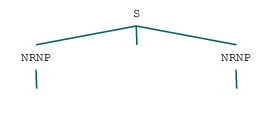

In [65]:
regex_extractor("動詞に着目")

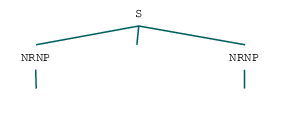

In [66]:
regex_extractor("学生は自転車")

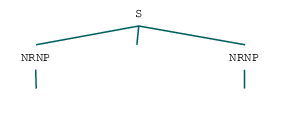

In [67]:
regex_extractor("学生の自転車")

In [68]:
len(regex_extractor(test))

157

In [80]:
result = []
for i in regex_extractor(test):
    if "NRNP" in str(i):
        result.append("".join([t[0] for t in i]))
result

['テキスト',
 '談話',
 '理解',
 'ため',
 '文章構造',
 '理解',
 '必要',
 '文章構造',
 '従来',
 '多く',
 '研究',
 '解析',
 '知識',
 '問題',
 '重点',
 '量的/質的',
 '十分な計算機用',
 '知識',
 '作成',
 'こと',
 '間期待',
 '論文',
 '知識',
 '文理解',
 '処理',
 '表層表現中',
 '種々',
 '情報',
 'こと',
 '科学技術文',
 '文章構造',
 '自動的',
 '推定',
 '方法',
 '表層表現中',
 '情報',
 '種々',
 '手がかり表現',
 '一/同義',
 '語/句',
 '出現，2文間',
 '類似性，',
 '3',
 'もの',
 '着目',
 '実験',
 '結果これら',
 '情報',
 '利用',
 'こと',
 '科学技術文',
 '文章構造',
 'かなり',
 '部分',
 '自動的',
 '推定可能であること']

In [89]:
from collections import Counter
res_dict = {"1":0,
           "2":0,
           "3":0,
           "3+":0}
length = len(result)
for num in list(Counter(result).values()):
    if num == 1:
        res_dict["1"]+=1/length
    elif num == 2:
        res_dict["2"]+=1/length
    elif num == 3:
        res_dict["3"]+=1/length
    else:
        res_dict["3+"]+=1/length
res_dict

{'1': 0.5892857142857143,
 '2': 0.08928571428571427,
 '3': 0.05357142857142857,
 '3+': 0.017857142857142856}

In [51]:
for i in regex_extractor("学生の自転車の持ち主"):
    print(i)

(RNP (NRNP 学生/名詞 の/助詞連体化 自転車/名詞) の/助詞連体化 持ち主/名詞)


In [76]:
def get_unique_entities(text):
    """
    ユニークな非再帰的名詞句を数える
    """
    result = []
    for i in regex_extractor(text):
        if "NRNP" in str(i):
            result.append("".join([t[0] for t in i]))
    return list(set(result))

In [78]:
len(get_unique_entities(test))

42

In [161]:
grammar = CFG.fromstring("""
NP -> 名詞|動詞 助詞連体化|助動詞 名詞
""")

In [164]:
cp = nltk.RegexpChunkParser(grammar)

In [169]:
cp.parse_sents(sent)

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x7f11f693eb48>